In [5]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

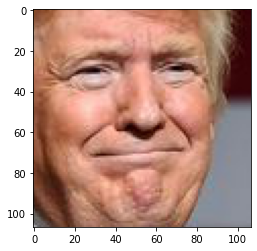

In [8]:
dir_path = os.getenv('HOME')+'/workplace/aiffel/face_embedding/images'
image_file = os.path.join(dir_path, 'trump.jpg')

face = get_gropped_face(image_file)
plt.imshow(face)

pillow_image = Image.fromarray(face)
pillow_image.save(image_file)

In [ ]:

file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

In [ ]:
image_file = os.path.join(dir_path, 'obama.jpg')
face = get_gropped_face(image_file)
# 얼굴 영역을 구하는 함수(이전 스텝에서 구현)
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

In [ ]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding =  face_recognition.face_encodings(face)
        if len(embedding) > 0:
           embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [ ]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('obama', 'trump')

In [ ]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

In [ ]:
def get_nearest_face(name, top=5): 
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

홍세현12:16 PM
김대명','신태용','도아','산들', '사무엘 L 잭슨', '신비','한효주','이승환'